# Toy Model for the Utilization Ratio Smoothener and its effects on Rewards

*Danilo Lessa Bernardineli (BlockScience), February 2024*

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd 


N_t = 7 * 24 * 60 * 6 # Around 7 days of blocks

def B(g, c=1, d=1):
    return np.tanh(-c * (g - d))


from datetime import timedelta
from mockseries.trend import LinearTrend
from mockseries.seasonality import SinusoidalSeasonality
from mockseries.noise import RedNoise
from mockseries.utils import datetime_range
from mockseries.utils import plot_timeseries



seasonality = SinusoidalSeasonality(amplitude=0.05, period=timedelta(days=1)) \
              + SinusoidalSeasonality(amplitude=0.01, period=timedelta(hours=1))
noise = RedNoise(mean=0.05, std=0.5, correlation=0.5)

timeseries = seasonality + noise

from datetime import datetime

time_points = datetime_range(
    granularity=timedelta(seconds=10),
    start_time=datetime(2024, 2, 1),
    end_time=datetime(2024, 2, 2),
)
ts_values = timeseries.generate(time_points=time_points)

y_1 = np.array([max(y_i, 0) for y_i in ts_values])
y_2 = (y_1 - y_1.min()) / (y_1.max() -y_1.min())


tilde_B_y = B(y_2)

N_threshold = 100
k = 0.5
g_hat = np.zeros(len(tilde_B_y))
for i, g_i in enumerate(y_2):
    if i == 0:
        g_i_hat = g_i
    elif i < N_threshold:
        g_i_hat = (g_hat[i-1] + g_i) / 2
    elif i >= N_threshold:
        g_i_hat = k * g_i + (1 - k) * g_hat[i-1]
    else:
        raise Exception
    g_hat[i] = g_i_hat

g = np.array(y_2)
g_hat = np.array(g_hat)
B_g = B(g)
B_g_hat = B(g_hat)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


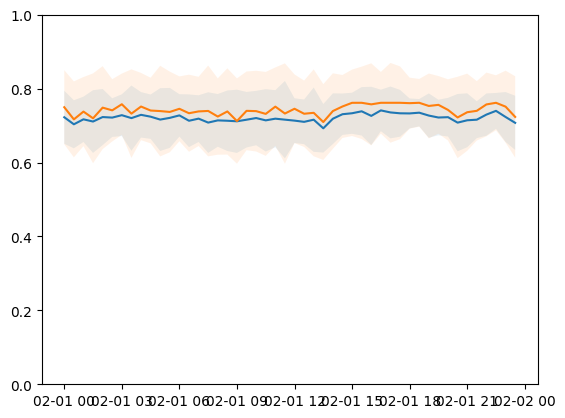

In [2]:
data = {'g': g, 'g_hat': g_hat, 'B': B_g_hat, 'B_tilde': B_g, 't': time_points}
df = pd.DataFrame(data).set_index('t')
avg_df = df.resample('30min').median()
std_df = df.resample('30min').std()

def fanplot(col):
    plt.plot(avg_df.index, avg_df[col])
    lower = avg_df[col] - std_df[col]
    upper = avg_df[col] + std_df[col]
    plt.fill_between(avg_df.index, lower, upper, alpha=0.1)
fanplot('B')
fanplot('B_tilde')
plt.ylim([0, 1])
plt.show()

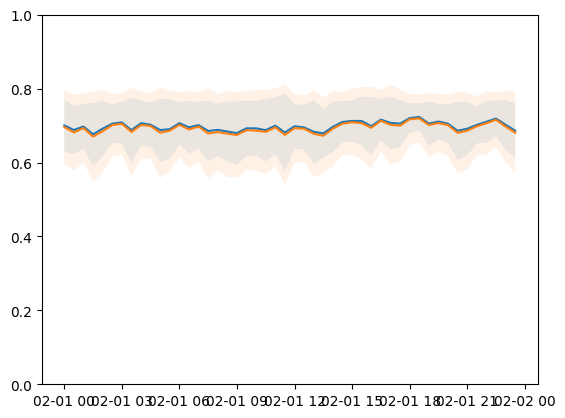

In [5]:
data = {'g': g, 'g_hat': g_hat, 'B': B_g_hat, 'B_tilde': B_g, 't': time_points}
df = pd.DataFrame(data).set_index('t')
avg_df = df.resample('30min').mean()
std_df = df.resample('30min').std()

def fanplot(col):
    plt.plot(avg_df.index, avg_df[col])
    lower = avg_df[col] - std_df[col]
    upper = avg_df[col] + std_df[col]
    plt.fill_between(avg_df.index, lower, upper, alpha=0.1)
fanplot('B')
fanplot('B_tilde')
plt.ylim([0, 1])
plt.show()

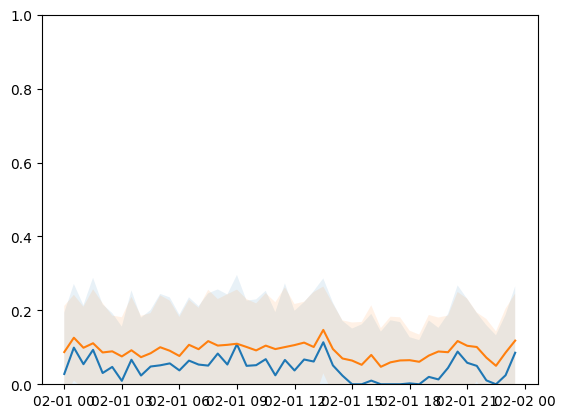

In [7]:
data = {'g': g, 'g_hat': g_hat, 'B': B_g_hat, 'B_tilde': B_g, 't': time_points}
df = pd.DataFrame(data).set_index('t')
avg_df = df.resample('30min').median()
std_df = df.resample('30min').std()

def fanplot(col):
    plt.plot(avg_df.index, avg_df[col])
    lower = avg_df[col] - std_df[col]
    upper = avg_df[col] + std_df[col]
    plt.fill_between(avg_df.index, lower, upper, alpha=0.1)
fanplot('g')
fanplot('g_hat')
plt.ylim([0, 1])
plt.show()